<h1><center><b>Wine Classification with Supervised and Unsupervised Machine Learning</b></center></h1>

## Data Loading

A wine recognition dataset was used for this analysis. The dataset is labelled, but we ignored the labels for the unsupervised machine learning. K-means clustering analysis was conducted first. The results of that analysis were used to label the data. The newly-labelled data was then used to perform a supervised machine learning using K-Nearest Neighbors.

In [1]:
from sklearn.datasets import load_wine
wine = load_wine()

## Data Exploration

### Dataset Characteristics

In [2]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

The information above shows that there are no missing attribute values, therefore we do not have to handle missing values for this dataset. The shape of the data is (178,13) which means that we have 178 data points, 13 attributes and 1 target variable for our dataset. The target variable is the wine class but would be ignored here as our research focused on unlabeled data. The 13 independent variables (attributes) are as follows: 

1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline

In [3]:
print(f'Ddata shape   = {wine.data.shape}')
print(f'Target shape  = {wine.target.shape}')
print(f'Target names  = {wine.target_names}')
print(f'Feature names = {wine.feature_names}')

Ddata shape   = (178, 13)
Target shape  = (178,)
Target names  = ['class_0' 'class_1' 'class_2']
Feature names = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


### Loading the Data into a Dataframe and Exploring the Data

In [4]:
import pandas as pd

wine_df = pd.DataFrame(wine.data, 
                             columns=wine.feature_names)
wine_df['class'] = pd.Series([wine.target_names[i] for i in wine.target])

In [5]:
pd.set_option('precision', 4)
pd.set_option('display.width', None)
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,class_2


In [6]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000
mean,13.0006,2.3363,2.3665,19.4949,99.7416,2.2951,2.0293,0.3619,1.5909,5.0581,0.9574,2.6117,746.8933
std,0.8118,1.1171,0.2743,3.3396,14.2825,0.6259,0.9989,0.1245,0.5724,2.3183,0.2286,0.7100,314.9075
min,11.0300,0.7400,1.3600,10.6000,70.0000,0.9800,0.3400,0.1300,0.4100,1.2800,0.4800,1.2700,278.0000
25%,12.3625,1.6025,2.2100,17.2000,88.0000,1.7425,1.2050,0.2700,1.2500,3.2200,0.7825,1.9375,500.5000
50%,13.0500,1.8650,2.3600,19.5000,98.0000,2.3550,2.1350,0.3400,1.5550,4.6900,0.9650,2.7800,673.5000
75%,13.6775,3.0825,2.5575,21.5000,107.0000,2.8000,2.8750,0.4375,1.9500,6.2000,1.1200,3.1700,985.0000
max,14.8300,5.8000,3.2300,30.0000,162.0000,3.8800,5.0800,0.6600,3.5800,13.0000,1.7100,4.0000,1680.0000


In [7]:
wine_df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
class                            object
dtype: object

In [8]:
print(wine_df['class'].describe())
print()

count         178
unique          3
top       class_1
freq           71
Name: class, dtype: object



As shown above, all the attribute values are numeric (*class* is the target variable) so we do not need to convert any categorical values to numeric. 

## Data Visualization

As no data clean-up is required, we can now create visualizations for each of the 13 attributes.

Text(0.5, 1.05, 'Figure without class as the hue')

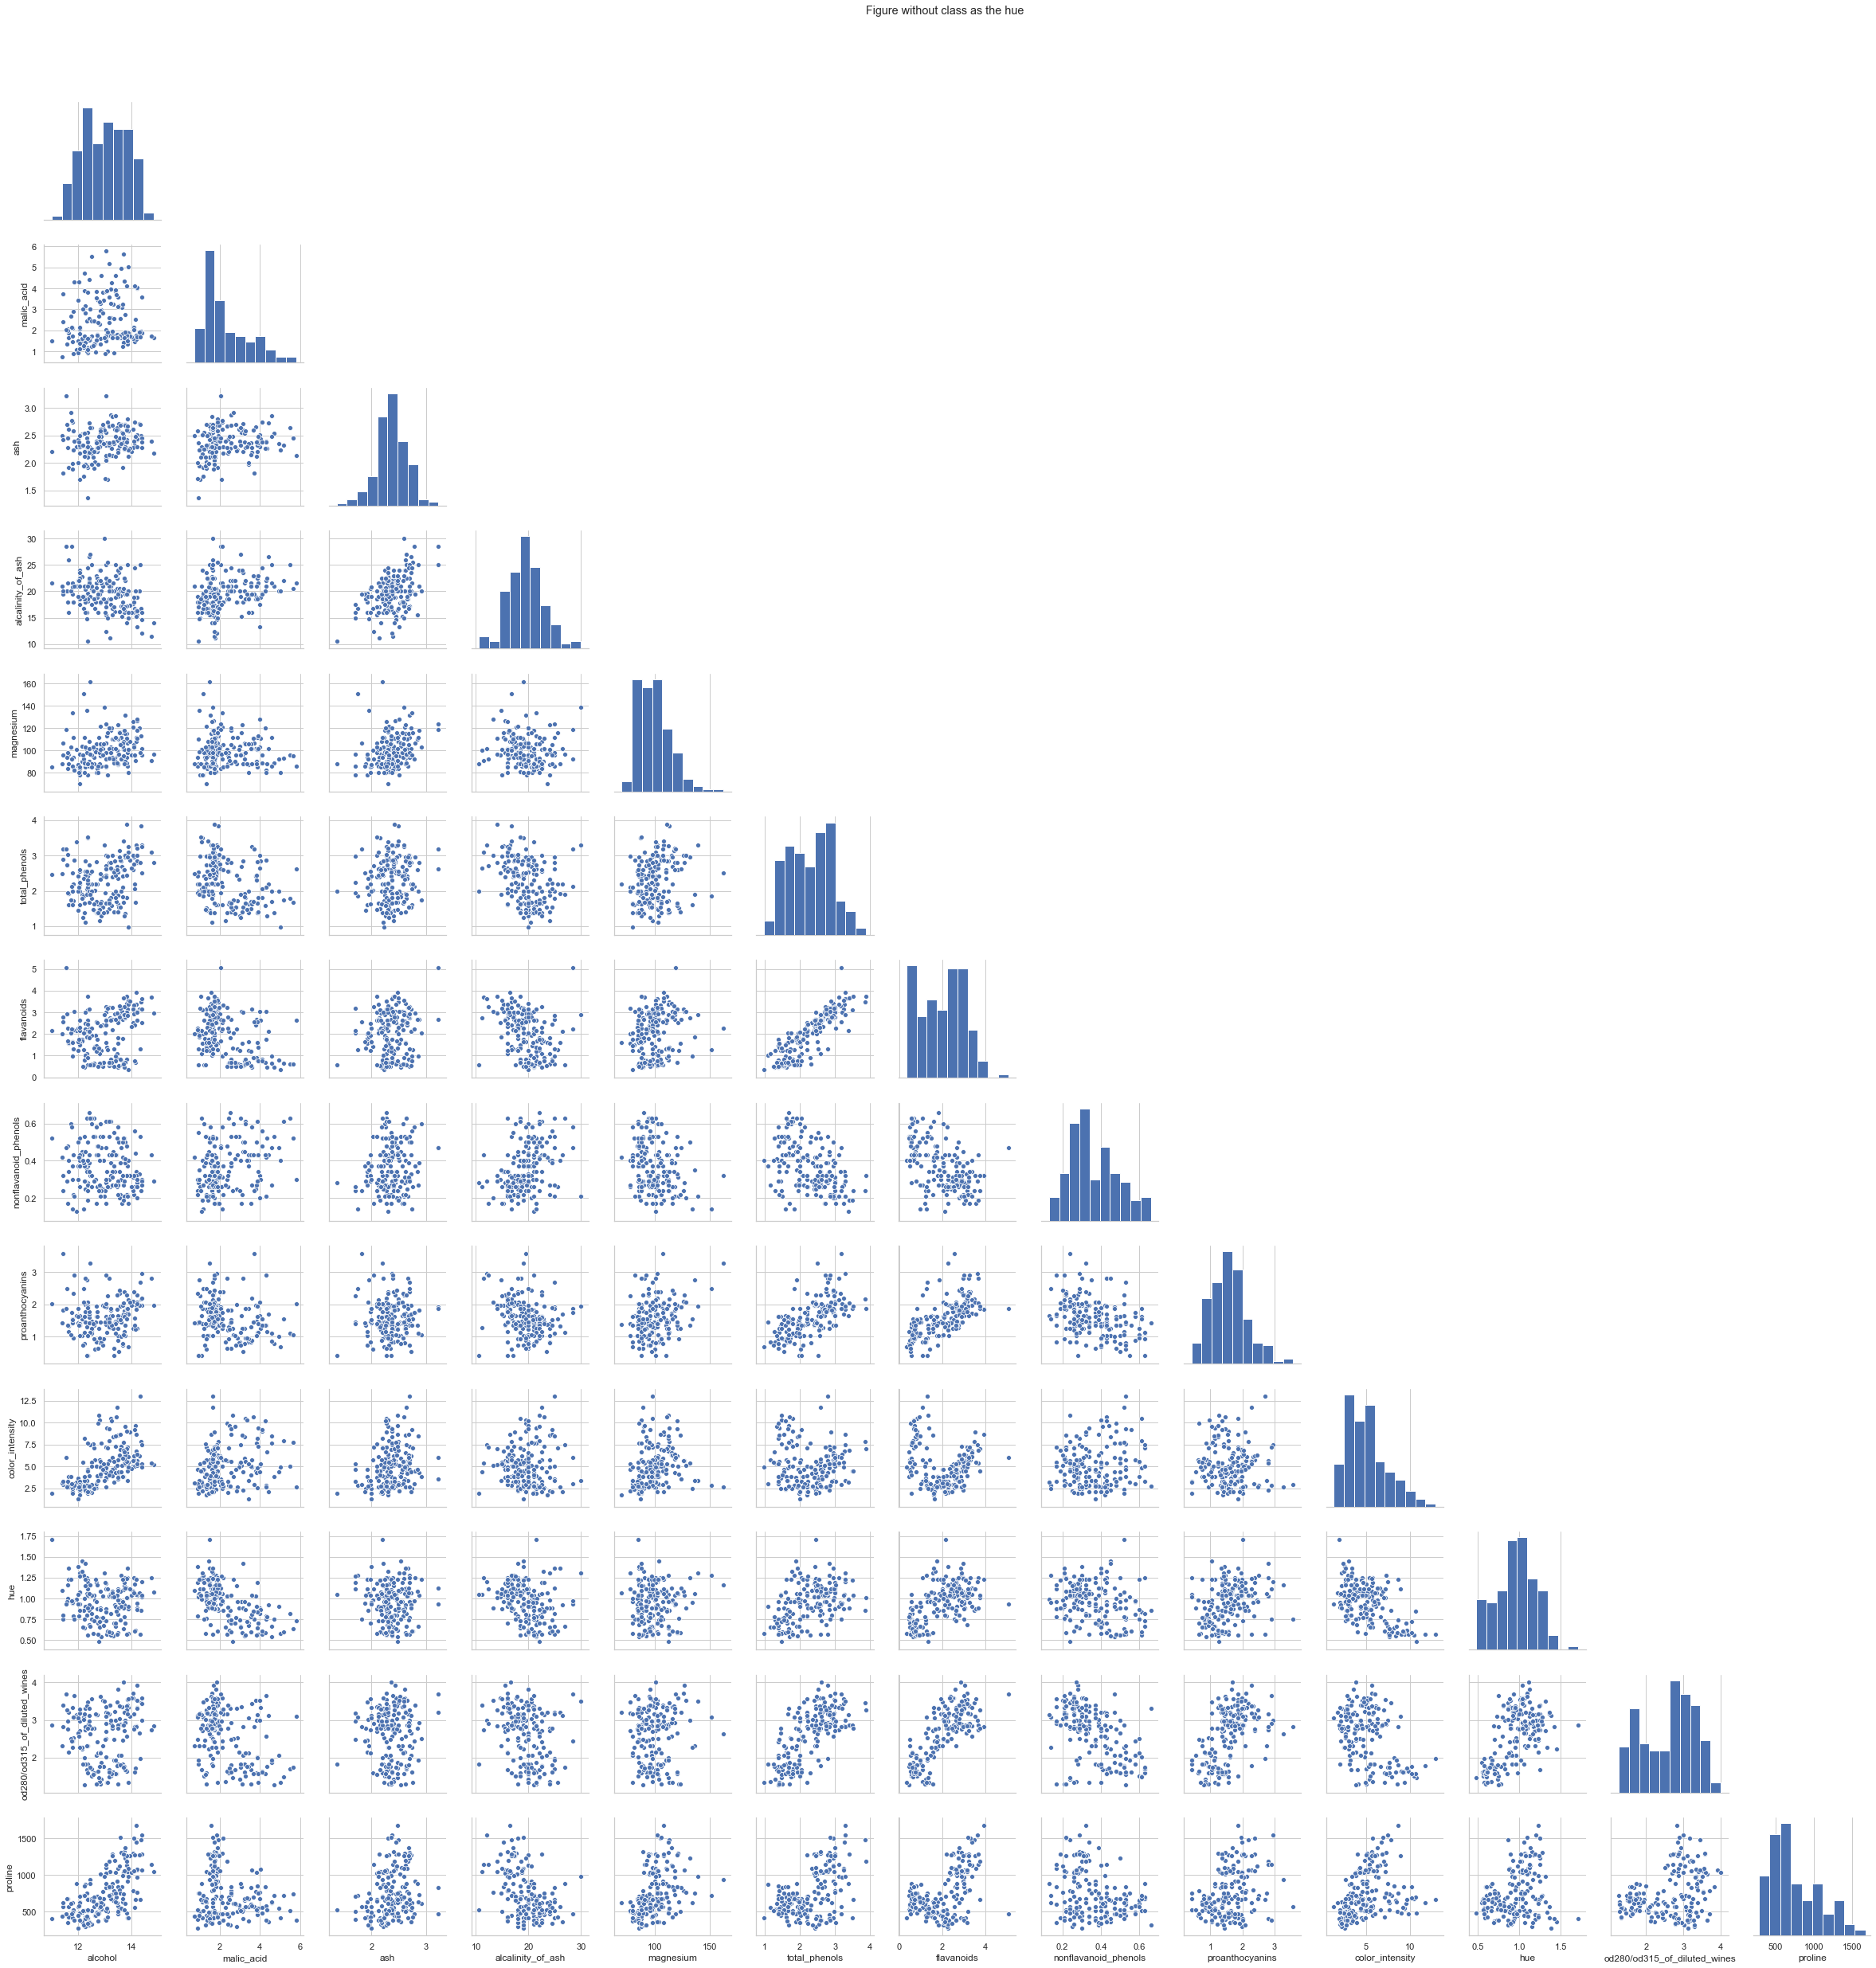

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1)
sns.set_style('whitegrid')

grid = sns.pairplot(data=wine_df, vars=wine_df.columns[0:13], corner = True)
grid.fig.suptitle("Figure without class as the hue", y=1.05)

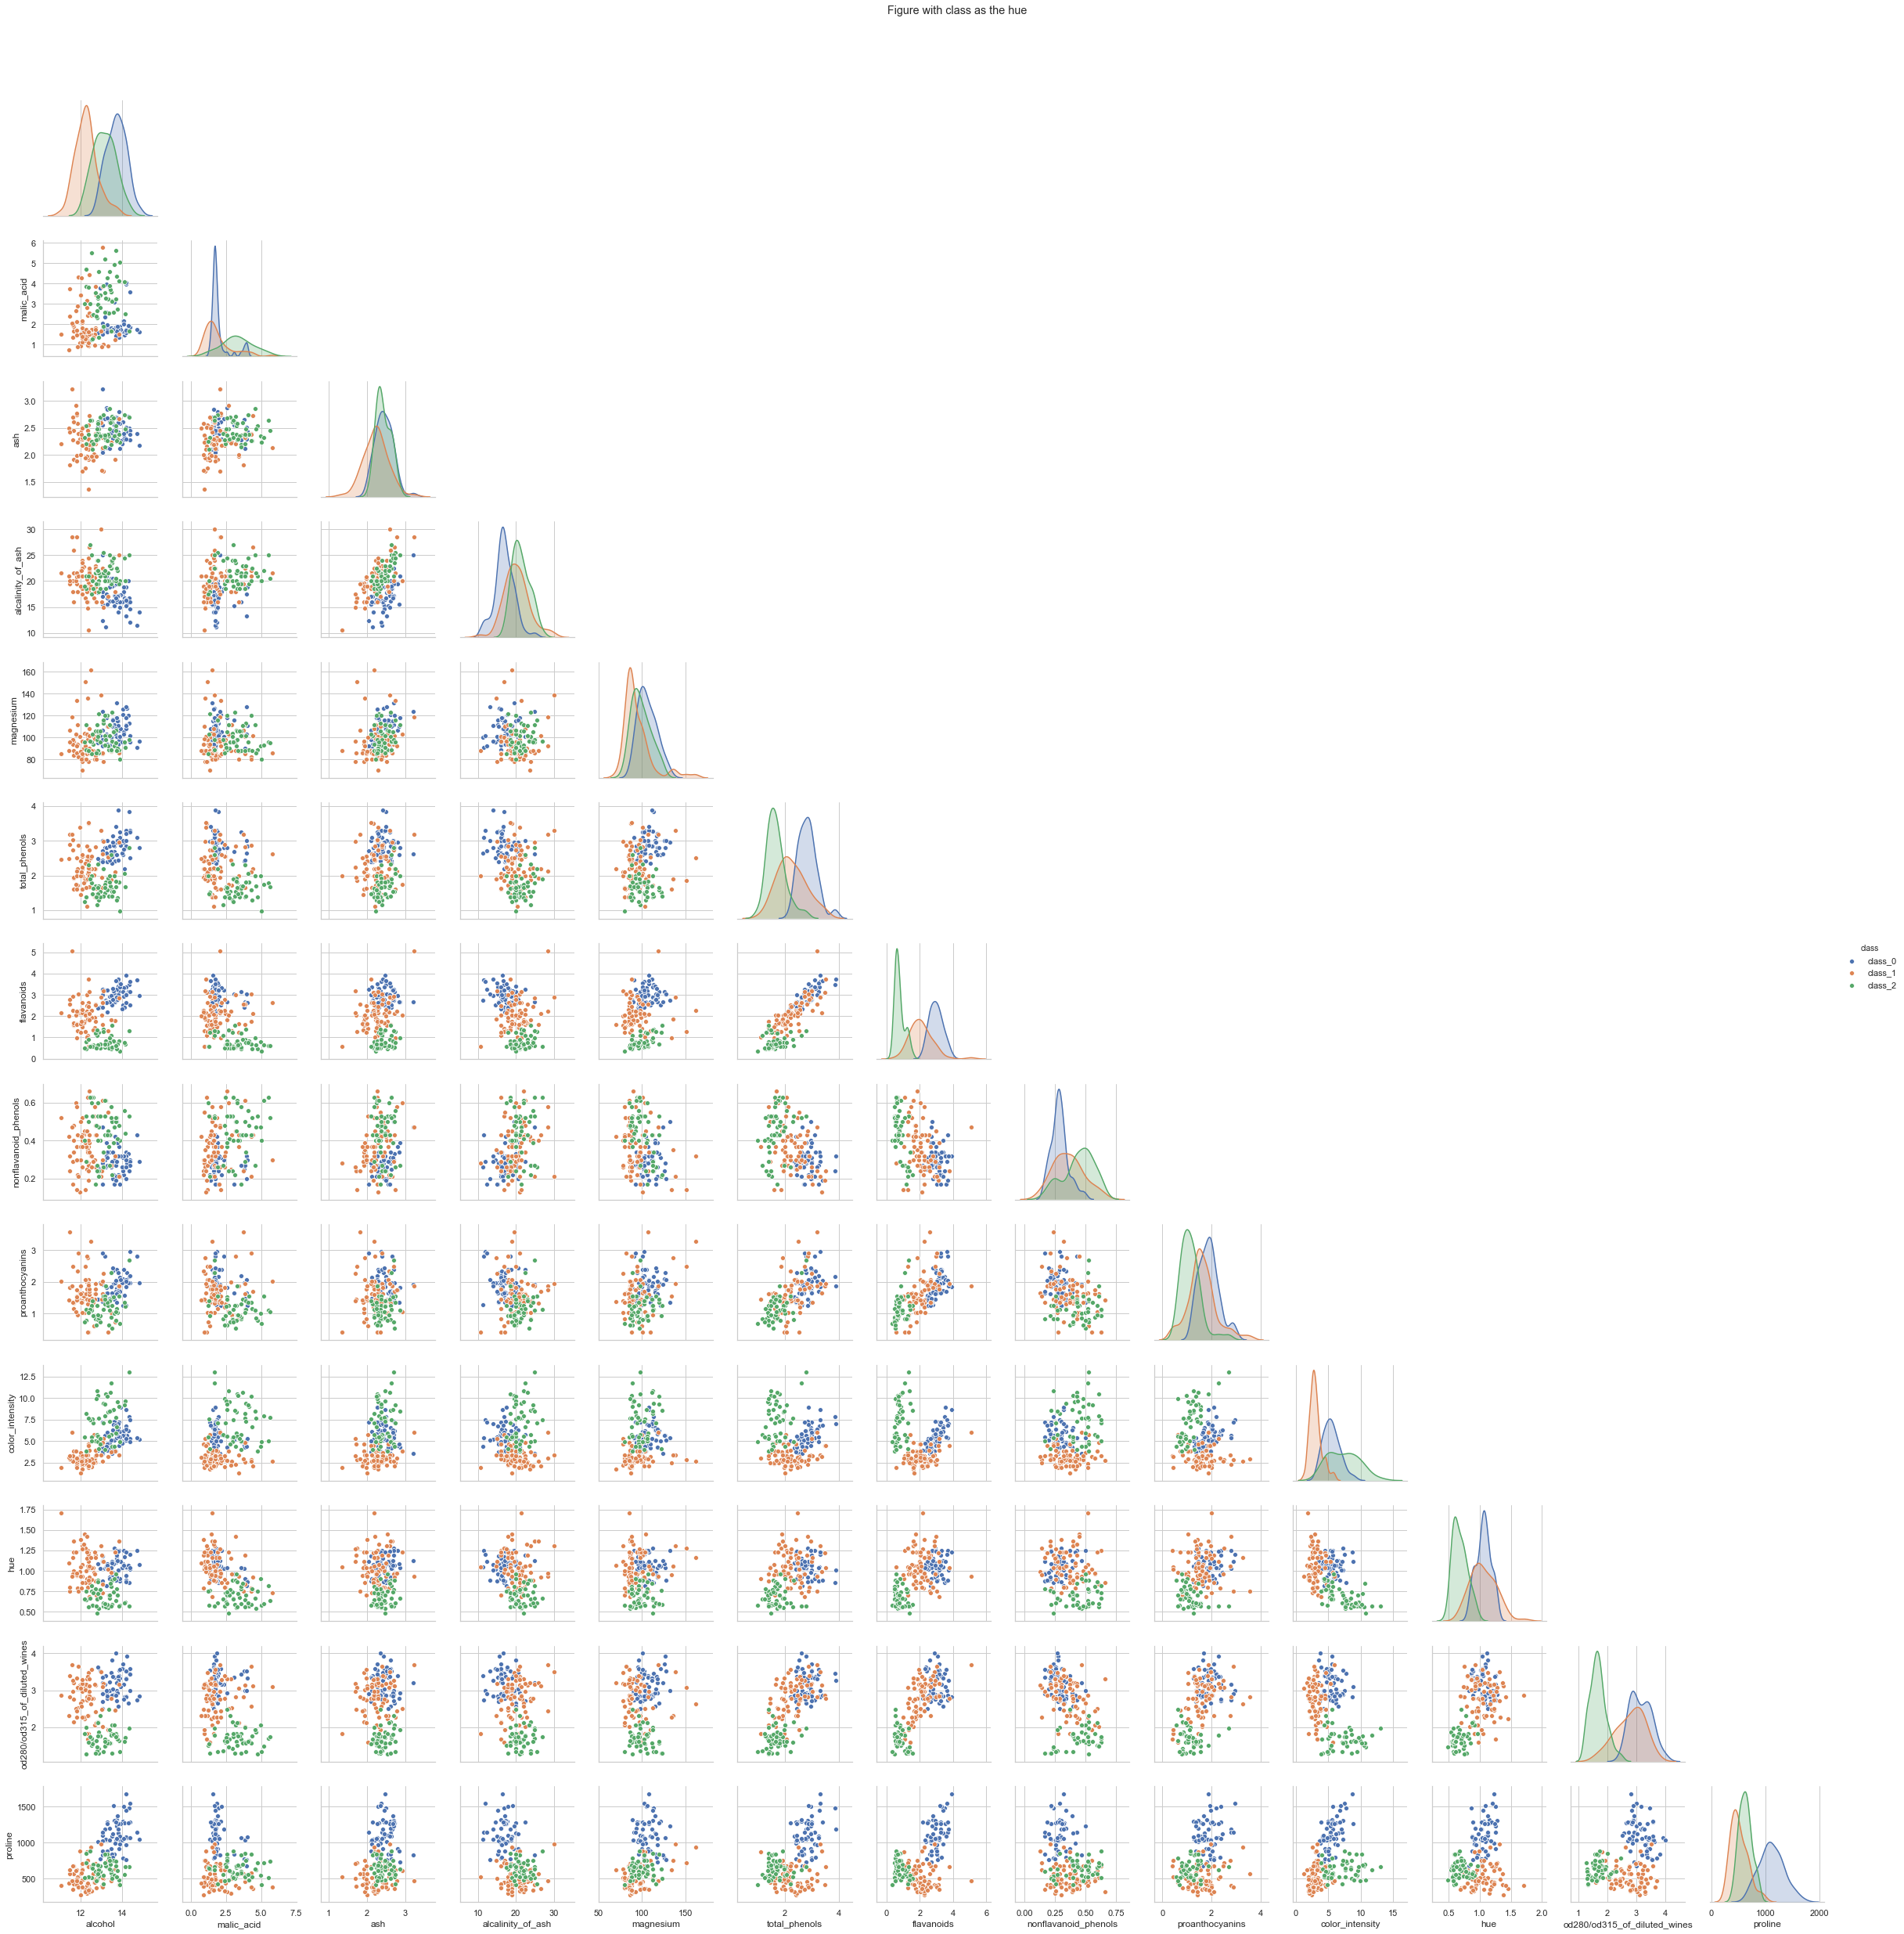

In [10]:
grid = sns.pairplot(data=wine_df, vars=wine_df.columns[0:13], hue='class', corner = True)
grid.fig.suptitle("Figure with class as the hue", y=1.05)
print()

The figure with *class* as the hue shows that all data could be classified into 3 clusters. However, without the label information (the figure without *class* as the hue), we couldn't figure out how many clusters the data has because the dataset has many attributed. Therefore, we should conduct dimensionality reduction analysis using PCA and TSNE. 

##  Dimensionality Reduction Analysis

### Principal component analysis (PCA)

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=11)  # reduce to two components
pca.fit(wine.data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=11,
    svd_solver='auto', tol=0.0, whiten=False)

In [12]:
reduced_wine_pca = pca.transform(wine.data)
print(f'Reduced wine data shape: {reduced_wine_pca.shape}')

Reduced wine data shape: (178, 2)


Here you could see that the previous 13 attributes were reduced to only 2 factors.

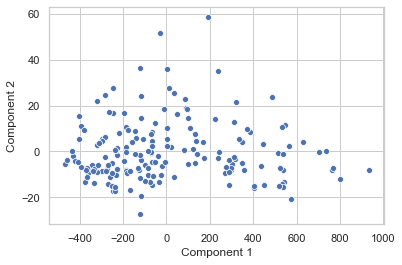

In [13]:
# visualize the reduced data
reduced_wine_pca_df = pd.DataFrame(reduced_wine_pca, columns=['Component 1', 'Component 2'])
reduced_wine_pca_df['class'] = wine_df['class']
import matplotlib.pyplot as plt
axes = sns.scatterplot(data=reduced_wine_pca_df, legend='brief', 
                       x='Component 1', y='Component 2') 

### t-distributed stochastic neighbor embedding (t-SNE)

In [14]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=11) # reduce to two components
reduced_wine_tsne = tsne.fit_transform(wine.data)

print(f'Reduced wine data shape: {reduced_wine_tsne.shape}')

Reduced wine data shape: (178, 2)


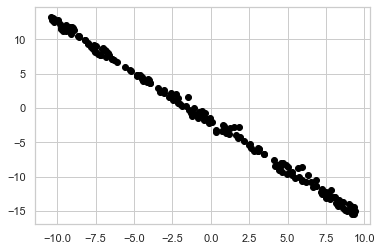

In [15]:
# visualize the reduced data

%matplotlib inline
import matplotlib.pyplot as plt
dots = plt.scatter(reduced_wine_tsne[:, 0], reduced_wine_tsne[:, 1], c='black')

### Compare the visualizations of PCA and t-SNE

As shown above, there is a huge difference between the visualizations of the two kinds of dimensionality reduction methods, i.e., PCA and t-SNE. The scatterplot of PCA looks closer to the plot of the unreduced data than the scatterplot of t-SNE does. From the figure of t-SNE it's hard to figure out how many clusters the data points could be classified into. However, from the figure of PCA we can see that the left bottom part of data points are stacked together and separated from others and that the right part of the data points are distributed relatively loosely. Therefore, the PCA estimator is better for our dataset.

The visualization for the data reduced by PCA demonstrates two non-clearly defined clusters but there are three classes in the data. As a result, we will try 2 and 3 separately as the default cluster number. Then we will compare the results and try to find which one is better.

##  K-Means Clustering (init = 'k-means++')

### Cluster number = 2

In [16]:
from sklearn.cluster import KMeans

kmeans_2 = KMeans(init = 'k-means++', n_clusters=2, random_state=11)  # find two clusters
kmeans_2.fit(wine.data)
wine_df['labeling_2'] = kmeans_2.labels_
kmeans_2.labels_

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

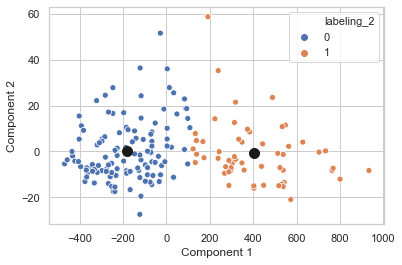

In [17]:
axes = sns.scatterplot(data=reduced_wine_pca_df, legend='brief', hue = wine_df['labeling_2'],
                       x='Component 1', y='Component 2') 
wine_centers_2 = pca.transform(kmeans_2.cluster_centers_)
dots = plt.scatter(wine_centers_2[:,0], wine_centers_2[:,1], s=100, c='k')

As there are three classes in the dataset, but this clustering assigned labels to two clusters, we cannot compare the actual and predicted labels.

### Cluster number = 3

In [18]:
kmeans_3 = KMeans(n_clusters=3, random_state=11)  # find three clusters
kmeans_3.fit(wine.data)
wine_df['labeling_3'] = kmeans_3.labels_
kmeans_3.labels_  ## label the unlabeled data

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int32)

#### Compare assigned labels with actual labels

Text(0.5, 1.0, 'Scatterplot with assgined labels as the hue')

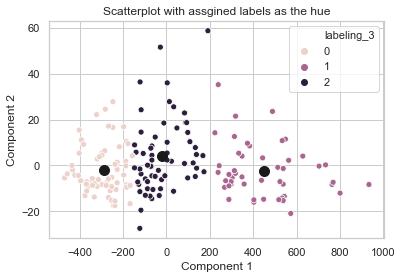

In [19]:
# scatterplot with assgined labels as the hue

axes = sns.scatterplot(data=reduced_wine_pca_df, legend='brief', hue = wine_df['labeling_3'],
                       x='Component 1', y='Component 2') 
wine_centers_3 = pca.transform(kmeans_3.cluster_centers_)
dots = plt.scatter(wine_centers_3[:,0], wine_centers_3[:,1], s=100, c='k')
axes.set_title("Scatterplot with assgined labels as the hue")

Text(0.5, 1.0, 'Scatterplot with actual labels as the hue')

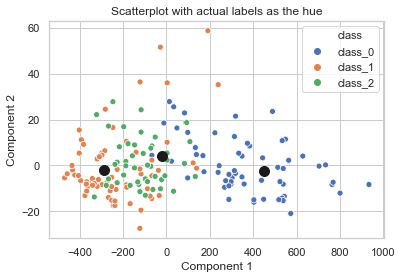

In [20]:
# scatterplot with actual labels as the hue

axes = sns.scatterplot(data=reduced_wine_pca_df, legend='brief', hue = 'class',
                       x='Component 1', y='Component 2') 
wine_centers_3 = pca.transform(kmeans_3.cluster_centers_)
dots = plt.scatter(wine_centers_3[:,0], wine_centers_3[:,1], s=100, c='k')
axes.set_title("Scatterplot with actual labels as the hue")

As shown by the labelled data above, the cluster on the left is class 1, the middle cluster is class 2 and the class on the right is class 0. This means that in our newly labelled data, label 0 corresponds to class 1, label 1 corresponds to class 0 and label 2 corresponds to class 2. We can use this information to calculate the percentage of values that were assigned correctly in each class.

In [21]:
# The first 59 rows of raw data are class_0

print(f'Assigned labels (0-58) = {kmeans_3.labels_[:59]}')
right_label_cl0 = 1
wrong_label_cl0 = [label for label in kmeans_3.labels_[:59] if label != right_label_cl0]
print(f'Wrong labels (class_0) = {wrong_label_cl0}')
wrong_rate_cl0 = len(wrong_label_cl0)/len(kmeans_3.labels_[:59])
print(f'Wrong rate (class_0)   = {wrong_rate_cl0:.2%}')
print('\n')


# The 59-129 rows of raw data are class_1

print(f'Assigned labels (59-129)= {kmeans_3.labels_[59:130]}')
right_label_cl1 = 0
wrong_label_cl1 = [label for label in kmeans_3.labels_[59:130] if label != right_label_cl1]
print(f'Wrong labels (class_0)  = {wrong_label_cl1}')
wrong_rate_cl1= len(wrong_label_cl1)/len(kmeans_3.labels_[59:130])
print(f'Wrong rate  (class_1)   = {wrong_rate_cl1:.2%}')
print('\n')


# The last 48 rows of raw data are class_2

print(f'Assigned labels (59-129)= {kmeans_3.labels_[130:]}')
right_label_cl2 = 2
wrong_label_cl2 = [label for label in kmeans_3.labels_[130:] if label != right_label_cl2]
print(f'Wrong labels (class_2)  = {wrong_label_cl2}')
wrong_rate_cl2 = len(wrong_label_cl2)/len(kmeans_3.labels_[130:])
print(f'Wrong rate (class_2)    = {wrong_rate_cl2:.2%}')

Assigned labels (0-58) = [1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2
 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Wrong labels (class_0) = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Wrong rate (class_0)   = 22.03%


Assigned labels (59-129)= [0 2 0 2 0 0 2 0 0 2 2 2 0 0 1 2 0 0 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2
 2 0 2 0 2 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]
Wrong labels (class_0)  = [2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Wrong rate  (class_1)   = 29.58%


Assigned labels (59-129)= [2 0 0 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2 2 0 0 0 0 2 2 2 0 2 2 2 0 2 0 2 2 0 2
 2 2 2 0 0 2 2 2 2 2 0]
Wrong labels (class_2)  = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Wrong rate (class_2)    = 39.58%


As shown by the stats above, the most accurate predictions were for class 0, where 78% of the data points in that cluster had the correct label.

## k-Nearest Neighbors (KNN)

As the original labels have 3 classifications, we will focus on the scenario that the dataset are assigned 3 kinds labels when conducting supervised machine learning. 

### Split the data for training and testing

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine_df['labeling_3'], random_state=11)

print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape  = {X_test.shape}')

print()
print(f'y_train.shape = {y_train.shape}')
print(f'y_test.shape  = {y_test.shape}')

X_train.shape = (133, 13)
X_test.shape  = (45, 13)

y_train.shape = (133,)
y_test.shape  = (45,)


### Create and train the k-nearest neighbors model

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Test the model by predicting wine classes 

#### Comparison of predicted labels to assigned labels 

In [24]:
predicted = list(knn.predict(X=X_test))
actual_labeling_3 = list(y_test)


print(f'predicted         = {predicted}')
print()
print(f'actual_labeling_3 = {actual_labeling_3}')
print()

wrong_pred_act_label = [ (pred, act_label) 
          for (pred, act_label) in zip(predicted, actual_labeling_3) 
          if pred != act_label]
print('Wrong predictions (comparing with assigned labels):')
print(wrong_pred_act_label)
print()
print(f'Prediction accuracy score = {knn.score(X_test, y_test):.2%}')

predicted         = [2, 1, 0, 1, 1, 1, 0, 0, 2, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 0, 1, 0, 1, 1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 1, 1, 1, 2]

actual_labeling_3 = [2, 1, 0, 1, 1, 1, 0, 0, 2, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 0, 1, 0, 1, 1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 1, 1, 1, 2]

Wrong predictions (comparing with assigned labels):
[]

Prediction accuracy score = 100.00%


In [25]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=actual_labeling_3, y_pred=predicted)

print('Confusion matrix:')
print(confusion)

Confusion matrix:
[[17  0  0]
 [ 0 18  0]
 [ 0  0 10]]


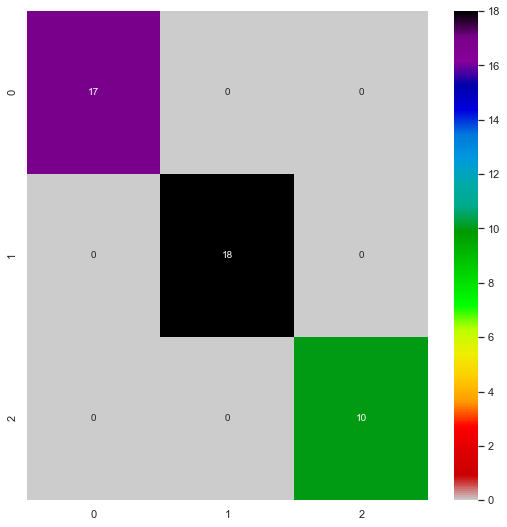

In [26]:
import pandas as pd
import seaborn as sns
plt.figure(figsize=(9, 9))
confusion_df = pd.DataFrame(confusion, index=range(3), columns=range(3))
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

In [27]:
# classification report

from sklearn.metrics import classification_report
names = [str(cl) for cl in wine.target_names]
print(classification_report(actual_labeling_3, predicted, target_names=names))

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        17
     class_1       1.00      1.00      1.00        18
     class_2       1.00      1.00      1.00        10

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



As shown above, the model is able to predict wine class with 100% accuracy.

#### Comparison of predicted labels to original labels 

In [28]:
actual_class = [wine_df.loc[i,'class'] for i in y_test.index]
predicted_class = []
for i in predicted:
    if i == 1:
        predicted_class.append('class_0') ## label = 1 means class_0 in the prediction
    elif i== 0:
        predicted_class.append('class_1') ## label = 0 means class_1 in the prediction
    else:
        predicted_class.append('class_2') ## label = 2 means class_2 in the prediction

    
print(f'predicted_class   = {predicted_class}')
print()
print(f'actual_class      = {actual_class}')

predicted_class   = ['class_2', 'class_0', 'class_1', 'class_0', 'class_0', 'class_0', 'class_1', 'class_1', 'class_2', 'class_0', 'class_2', 'class_1', 'class_0', 'class_2', 'class_2', 'class_1', 'class_0', 'class_2', 'class_1', 'class_1', 'class_0', 'class_1', 'class_0', 'class_0', 'class_0', 'class_2', 'class_0', 'class_1', 'class_1', 'class_0', 'class_1', 'class_1', 'class_1', 'class_1', 'class_1', 'class_1', 'class_0', 'class_0', 'class_2', 'class_2', 'class_1', 'class_0', 'class_0', 'class_0', 'class_2']

actual_class      = ['class_2', 'class_0', 'class_1', 'class_0', 'class_0', 'class_0', 'class_1', 'class_1', 'class_1', 'class_0', 'class_2', 'class_1', 'class_0', 'class_0', 'class_1', 'class_1', 'class_0', 'class_2', 'class_1', 'class_1', 'class_0', 'class_2', 'class_0', 'class_0', 'class_0', 'class_1', 'class_0', 'class_1', 'class_1', 'class_0', 'class_1', 'class_1', 'class_2', 'class_1', 'class_2', 'class_2', 'class_0', 'class_0', 'class_2', 'class_2', 'class_1', 'class_0', 

In [29]:
wrong_pred_act_class = [ (pred_class, act_class) 
          for (pred_class, act_class) in zip(predicted_class, actual_class) 
          if pred_class != act_class]
print('Wrong predictions (comparing with orginal labels):')
print(wrong_pred_act_class)
print()
print(f'Prediction accuracy score = {(len(predicted_class)-len(wrong_pred_act_class))/len(predicted_class):.2%}')

Wrong predictions (comparing with orginal labels):
[('class_2', 'class_1'), ('class_2', 'class_0'), ('class_2', 'class_1'), ('class_1', 'class_2'), ('class_2', 'class_1'), ('class_1', 'class_2'), ('class_1', 'class_2'), ('class_1', 'class_2'), ('class_0', 'class_1'), ('class_2', 'class_1')]

Prediction accuracy score = 77.78%


As shown above, when compared to the original label values the actual model accuracy is 77.78%, which is significantly lower than the value previously calculated.

## Further experiments

The results from the k-means clustering showed that k-means did not accurately identify the correct class for each data point. Therefore, it is worthwhile exploring other clustering algorithms and comparing the results. Here we try 2 algorithms: spectral clustering and k-means clustering but with its parameter ‘init’ set equal to 'random'.  

### Experimenting with Spectral Clustering

In [ ]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters = 3, affinity='nearest_neighbors', random_state=11)
wine_df['labeling_sc'] = sc.fit_predict(reduced_wine_pca)  
sc.labels_

Text(0.5, 1.0, 'Scatterplot with assgined labels as the hue')

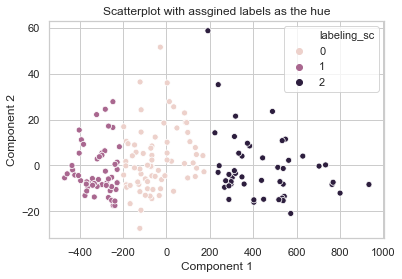

In [32]:
axes = sns.scatterplot(data=reduced_wine_pca_df, legend='brief', hue = wine_df['labeling_sc'],
                       x='Component 1', y='Component 2') 

axes.set_title("Scatterplot with assgined labels as the hue")

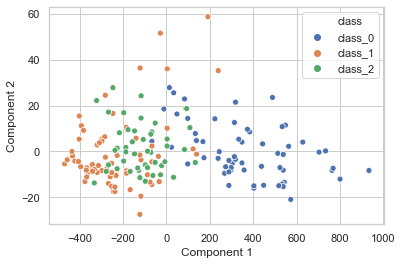

In [33]:
# scatterplot with actual labels as the hue

axes = sns.scatterplot(data=reduced_wine_pca_df, legend='brief', hue = 'class',
                       x='Component 1', y='Component 2') 
wine_centers_3 = pca.transform(kmeans_3.cluster_centers_)

In [34]:
# The first 59 rows of raw data are class_0

print(f'Assigned labels (0-58) = {sc.labels_[:59]}')
sc_right_label_cl0 = 2
sc_wrong_label_cl0 = [label for label in sc.labels_[:59] if label != sc_right_label_cl0]
print(f'Wrong labels (class_0) = {sc_wrong_label_cl0}')
sc_wrong_rate_cl0 = len(sc_wrong_label_cl0)/len(sc.labels_[:59])
print(f'Wrong rate (class_0)   = {sc_wrong_rate_cl0:.2%}')
print()


# The 59-129 rows of raw data are class_1

print(f'Assigned labels (59-129)= {sc.labels_[59:130]}')
sc_right_label_cl1 = 1
sc_wrong_label_cl1 = [label for label in sc.labels_[59:130] if label != sc_right_label_cl1]
print(f'Wrong labels (class_1)  = {sc_wrong_label_cl1}')
sc_wrong_rate_cl1 = len(sc_wrong_label_cl1)/len(sc.labels_[59:130])
print(f'Wrong rate  (class_1)   = {sc_wrong_rate_cl1:.2%}')
print()


# The last 48 rows of raw data are class_2

print(f'Assigned labels (59-129)= {sc.labels_[130:]}')
sc_right_label_cl2 = 0
sc_wrong_label_cl2 = [label for label in sc.labels_[130:] if label != sc_right_label_cl2]
print(f'Wrong labels (class_2)  = {sc_wrong_label_cl2}')
sc_wrong_rate_cl2 = len(sc_wrong_label_cl2)/len(sc.labels_[130:])
print(f'Wrong rate (class_2)    = {sc_wrong_rate_cl2:.2%}')

Assigned labels (0-58) = [2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2 2 2 2 2 2 0 0
 2 2 0 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Wrong labels (class_0) = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Wrong rate (class_0)   = 22.03%

Assigned labels (59-129)= [1 0 1 0 1 1 0 1 1 0 0 0 1 1 2 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 2
 0 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0]
Wrong labels (class_1)  = [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Wrong rate  (class_1)   = 36.62%

Assigned labels (59-129)= [0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0
 0 0 0 1 1 0 0 0 0 0 0]
Wrong labels (class_2)  = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Wrong rate (class_2)    = 25.00%


The statistics above show that spectral clustering is less effective at clustering this dataset. For class_0, the wrong rate of prediction is same as that of k-means. However, for class_1 nearly 7% more data points are predicted wrongly than the result of k-means clustering. For class_2, spectral clustering increase the prediction accuracy from the 60% of k-means clustering to 75%. 

### Experimenting with k-Means (init = 'random')

In [35]:
kmeans_3_ran = KMeans(init='random', n_clusters=3, random_state=11, n_init=10)
kmeans_3_ran.fit(wine.data)
wine_df['labeling_3_ran'] = kmeans_3_ran.labels_

Text(0.5, 1.0, 'Scatterplot with assgined labels as the hue')

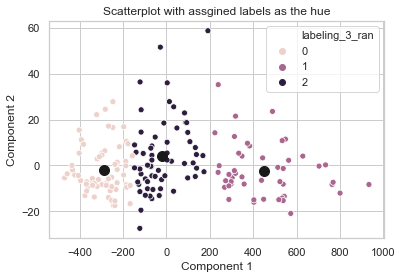

In [36]:
axes = sns.scatterplot(data=reduced_wine_pca_df, legend='brief', hue = wine_df['labeling_3_ran'],
                       x='Component 1', y='Component 2') 
wine_centers_3_ran = pca.transform(kmeans_3_ran.cluster_centers_)
dots = plt.scatter(wine_centers_3_ran[:,0], wine_centers_3_ran[:,1], s=100, c='k')
axes.set_title("Scatterplot with assgined labels as the hue")

Text(0.5, 1.0, 'Scatterplot with actual labels as the hue')

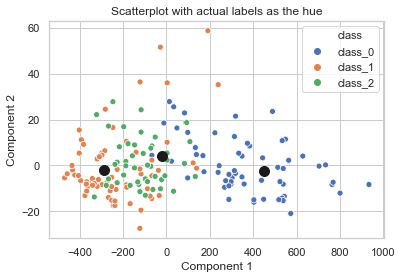

In [37]:
# scatterplot with actual labels as the hue

axes = sns.scatterplot(data=reduced_wine_pca_df, legend='brief', hue = 'class',
                       x='Component 1', y='Component 2') 
wine_centers_3 = pca.transform(kmeans_3.cluster_centers_)
dots = plt.scatter(wine_centers_3[:,0], wine_centers_3[:,1], s=100, c='k')
axes.set_title("Scatterplot with actual labels as the hue")

In [38]:
# The first 59 rows of raw data are class_0

print(f'Assigned labels (0-58) = {kmeans_3_ran.labels_[:59]}')
right_label_cl0 = 1
wrong_label_cl0 = [label for label in kmeans_3_ran.labels_[:59] if label != right_label_cl0]
print(f'Wrong labels (class_0) = {wrong_label_cl0}')
wrong_rate_cl0 = len(wrong_label_cl0)/len(kmeans_3_ran.labels_[:59])
print(f'Wrong rate (class_0)   = {wrong_rate_cl0:.2%}')
print()


# The 59-129 rows of raw data are class_1

print(f'Assigned labels (59-129)= {kmeans_3_ran.labels_[59:130]}')
right_label_cl1 = 0
wrong_label_cl1 = [label for label in kmeans_3_ran.labels_[59:130] if label != right_label_cl1]
print(f'Wrong labels (class_1)  = {wrong_label_cl1}')
wrong_rate_cl1 = len(wrong_label_cl1)/len(kmeans_3_ran.labels_[59:130])
print(f'Wrong rate  (class_1)   = {wrong_rate_cl1:.2%}')
print()


# The last 48 rows of raw data are class_2

print(f'Assigned labels (59-129)= {kmeans_3_ran.labels_[130:]}')
right_label_cl2 = 2
wrong_label_cl2 = [label for label in kmeans_3_ran.labels_[130:] if label != right_label_cl2]
print(f'Wrong labels (class_2)  = {wrong_label_cl2}')
wrong_rate_cl2 = len(wrong_label_cl2)/len(kmeans_3_ran.labels_[130:])
print(f'Wrong rate (class_2)    = {wrong_rate_cl2:.2%}')
print()

Assigned labels (0-58) = [1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2
 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Wrong labels (class_0) = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Wrong rate (class_0)   = 22.03%

Assigned labels (59-129)= [0 2 0 2 0 0 2 0 0 2 2 2 0 0 1 2 0 0 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2
 2 0 2 0 2 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]
Wrong labels (class_1)  = [2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Wrong rate  (class_1)   = 29.58%

Assigned labels (59-129)= [2 0 0 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2 2 0 0 0 0 2 2 2 0 2 2 2 0 2 0 2 2 0 2
 2 2 2 0 0 2 2 2 2 2 0]
Wrong labels (class_2)  = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Wrong rate (class_2)    = 39.58%



The statistics above show that there is no difference in prediction accuracy when making the parameter *init* equal to "random" or "k-means++".